# Comparación entre Normalización y Estandarización en un modelo de Regresión Logística
Este notebook muestra cómo afecta el preprocesamiento de características a un modelo simple usando MinMaxScaler y StandardScaler.

### ¿Cuándo usar Normalización?


>    Algoritmos que dependen de distancias (como k‑NN, k‑Means o redes neuronales), requieren que las características estén en una escala similar para evitar que las variables con magnitudes mayores dominen el cálculo de distancia.
>    Si las características tienen rangos muy distintos (edad vs ingresos, por ejemplo), la normalización (Min‑Max) asegura que cada variable aporte proporcionalmente sin sesgos.
>   También se recomienda cuando la distribución es desconocida o no es Gaussiana, pues no requiere media ni varianza conocidas.

 

**Riesgos o limitaciones:**

    Muy sensible a valores extremos (outliers), ya que la presencia de valores mínimos o máximos atípicos condiciona todo el rango.

### ¿Cuándo usar Estandarización?

>     Ideal para algoritmos que asumen distribución normal, como regresión logística, regresión lineal o PCA, donde se busca media cero y desviación estándar uno.
>     Funciona mejor si el conjunto de datos contiene outliers, ya que no se ve afectada por valores extremos como sí pasa con la normalización.
>     También se utiliza en modelos con regularización (Lasso, Ridge, SVM, redes neuronales), donde el algoritmo penaliza coeficientes en función de su escala. Una estandarización adecuada mejora convergencia y estabilidad.
>     Ayuda a acelerar el entrenamiento basado en descenso de gradiente al evitar que una característica domine las actualizaciones del gradiente.

| Técnica             | ¿Qué hace?                          | Cuándo usarla                                                                                    |
| ------------------- | ----------------------------------- | ------------------------------------------------------------------------------------------------ |
| **Normalización**   | Escala a rango \[0, 1] (Min‑Max)    | Cuando el algoritmo usa distancias, datos sin distribución clara o muy heterogéneos              |
| **Estandarización** | Media = 0, desviación = 1 (Z-score) | Si la distribución es Gaussiana o existen *outliers*, o se usan modelos lineales o regularizados |


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset sintético con dos características en escalas distintas
np.random.seed(42)
X = np.random.rand(500, 2) * [100, 1000] + [50, 5000]
y = (X[:, 0] + X[:, 1] > 5300).astype(int)

In [9]:
X

array([[  87.45401188, 5950.71430641],
       [ 123.19939418, 5598.6584842 ],
       [  65.60186404, 5155.99452034],
       [  55.80836122, 5866.17614577],
       [ 110.11150117, 5708.0725778 ],
       [  52.05844943, 5969.90985216],
       [ 133.24426408, 5212.33911068],
       [  68.18249672, 5183.40450985],
       [  80.4242243 , 5524.75643163],
       [  93.19450186, 5291.2291402 ],
       [ 111.18528947, 5139.49386065],
       [  79.21446485, 5366.36184329],
       [  95.60699842, 5785.17596139],
       [  69.96737822, 5514.23443841],
       [ 109.24145689, 5046.45041272],
       [ 110.75448519, 5170.52412369],
       [  56.5051593 , 5948.88553725],
       [ 146.56320331, 5808.39734812],
       [  80.46137692, 5097.67211401],
       [ 118.42330265, 5440.15249374],
       [  62.20382348, 5495.17691011],
       [  53.43885211, 5909.32040208],
       [  75.87799816, 5662.52228435],
       [  81.17110761, 5520.06802118],
       [ 104.67102793, 5184.85445553],
       [ 146.95846278, 57

In [10]:
y

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [3]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [4]:
# Escalado con MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

In [5]:
# Escalado con StandardScaler
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

In [6]:
# Entrenamiento con datos normalizados
model_minmax = LogisticRegression()
model_minmax.fit(X_train_minmax, y_train)
pred_minmax = model_minmax.predict(X_test_minmax)
acc_minmax = accuracy_score(y_test, pred_minmax)

In [7]:
# Entrenamiento con datos estandarizados
model_standard = LogisticRegression()
model_standard.fit(X_train_standard, y_train)
pred_standard = model_standard.predict(X_test_standard)
acc_standard = accuracy_score(y_test, pred_standard)

In [8]:
# Comparación de resultados
print(f"Precisión con normalización (Min-Max): {acc_minmax:.3f}")
print(f"Precisión con estandarización (Z-score): {acc_standard:.3f}")

Precisión con normalización (Min-Max): 0.936
Precisión con estandarización (Z-score): 1.000


In [12]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Cargar el dataset Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Mostrar las primeras filas del dataset
print("Dataset Iris original:")
print(df.head())
print("\nEstadísticas descriptivas del dataset original:")
print(df.describe())


Dataset Iris original:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Estadísticas descriptivas del dataset original:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%     

In [14]:
# Seleccionar una característica para visualizar antes y después de la transformación
feature_to_transform = 'sepal length (cm)'

# --- Aplicar Normalización (Min-Max Scaling) ---
print(f"\n--- Aplicando Normalización (Min-Max Scaling) a '{feature_to_transform}' ---")
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
df_normalized = df.copy()
df_normalized[feature_to_transform] = scaler_minmax.fit_transform(df[[feature_to_transform]])

print("\nEstadísticas descriptivas después de Normalización:")
print(df_normalized.describe())

# --- Aplicar Estandarización (Standard Scaling) ---
print(f"\n--- Aplicando Estandarización (Standard Scaling) a '{feature_to_transform}' ---")
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[feature_to_transform] = scaler_standard.fit_transform(df[[feature_to_transform]])

print("\nEstadísticas descriptivas después de Estandarización:")
print(df_standardized.describe())


--- Aplicando Normalización (Min-Max Scaling) a 'sepal length (cm)' ---

Estadísticas descriptivas después de Normalización:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          3.057333           3.758000   
std             0.230018          0.435866           1.765298   
min             0.000000          2.000000           1.000000   
25%             0.222222          2.800000           1.600000   
50%             0.416667          3.000000           4.350000   
75%             0.583333          3.300000           5.100000   
max             1.000000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.80000

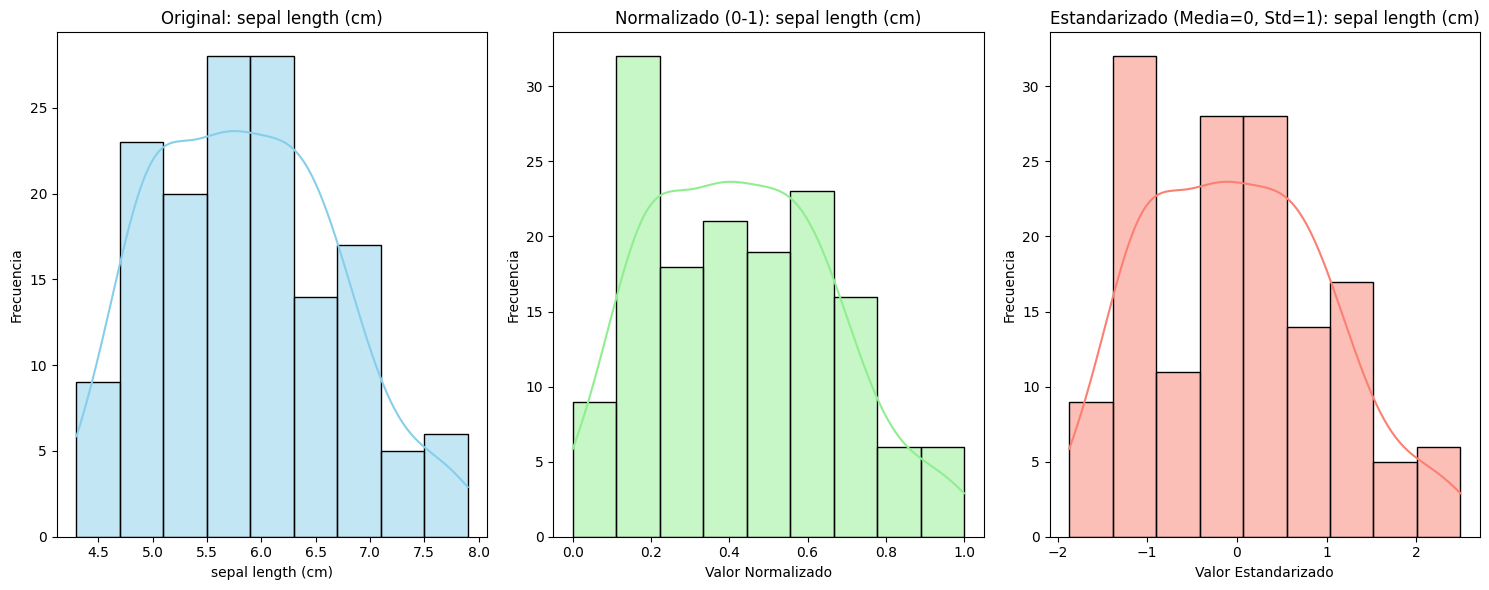

In [15]:
# --- Visualización de los resultados ---
plt.figure(figsize=(15, 6))

# Histograma de la característica original
plt.subplot(1, 3, 1)
sns.histplot(df[feature_to_transform], kde=True, color='skyblue')
plt.title(f"Original: {feature_to_transform}")
plt.xlabel(feature_to_transform)
plt.ylabel("Frecuencia")

# Histograma después de Normalización
plt.subplot(1, 3, 2)
sns.histplot(df_normalized[feature_to_transform], kde=True, color='lightgreen')
plt.title(f"Normalizado (0-1): {feature_to_transform}")
plt.xlabel("Valor Normalizado")
plt.ylabel("Frecuencia")

# Histograma después de Estandarización
plt.subplot(1, 3, 3)
sns.histplot(df_standardized[feature_to_transform], kde=True, color='salmon')
plt.title(f"Estandarizado (Media=0, Std=1): {feature_to_transform}")
plt.xlabel("Valor Estandarizado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [16]:
# --- Comparación de los valores de una pequeña muestra ---
print("\n--- Comparación de valores de una muestra ---")
sample_indices = [0, 5, 10] # Índices de ejemplo

print(f"\nOriginal '{feature_to_transform}':")
print(df.loc[sample_indices, [feature_to_transform]])

print(f"\nNormalizado '{feature_to_transform}':")
print(df_normalized.loc[sample_indices, [feature_to_transform]])

print(f"\nEstandarizado '{feature_to_transform}':")
print(df_standardized.loc[sample_indices, [feature_to_transform]])

# --- Aplicar ambas transformaciones a todo el dataset para un uso posterior ---
# Normalización a todo el dataset
scaler_minmax_all = MinMaxScaler(feature_range=(0, 1))
df_minmax_scaled = pd.DataFrame(scaler_minmax_all.fit_transform(df.drop(['target', 'species'], axis=1)),
                                columns=df.drop(['target', 'species'], axis=1).columns)
df_minmax_scaled['target'] = df['target'] # Re-añadir el target
df_minmax_scaled['species'] = df['species'] # Re-añadir la especie

print("\nPrimeras 5 filas del dataset con todas las características normalizadas:")
print(df_minmax_scaled.head())
print("\nEstadísticas descriptivas del dataset con todas las características normalizadas:")
print(df_minmax_scaled.describe())

# Estandarización a todo el dataset
scaler_standard_all = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_standard_all.fit_transform(df.drop(['target', 'species'], axis=1)),
                                  columns=df.drop(['target', 'species'], axis=1).columns)
df_standard_scaled['target'] = df['target'] # Re-añadir el target
df_standard_scaled['species'] = df['species'] # Re-añadir la especie

print("\nPrimeras 5 filas del dataset con todas las características estandarizadas:")
print(df_standard_scaled.head())
print("\nEstadísticas descriptivas del dataset con todas las características estandarizadas:")
print(df_standard_scaled.describe())


--- Comparación de valores de una muestra ---

Original 'sepal length (cm)':
    sepal length (cm)
0                 5.1
5                 5.4
10                5.4

Normalizado 'sepal length (cm)':
    sepal length (cm)
0            0.222222
5            0.305556
10           0.305556

Estandarizado 'sepal length (cm)':
    sepal length (cm)
0           -0.900681
5           -0.537178
10          -0.537178

Primeras 5 filas del dataset con todas las características normalizadas:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target species  
0       0  setosa  

In [17]:
# Separar las características (X) y el objetivo (y)
X = df.drop(['target', 'species'], axis=1)
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (105, 4)
Tamaño del conjunto de prueba: (45, 4)


In [18]:
# --- Normalización (Min-Max Scaling) ---
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test) # Usamos transform en el test set

print("Datos de entrenamiento normalizados (primeras 5 filas):\n", X_train_normalized[:5])
print("\nDatos de prueba normalizados (primeras 5 filas):\n", X_test_normalized[:5])

# --- Estandarización (Standard Scaling) ---
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test) # Usamos transform en el test set

print("\nDatos de entrenamiento estandarizados (primeras 5 filas):\n", X_train_standardized[:5])
print("\nDatos de prueba estandarizados (primeras 5 filas):\n", X_test_standardized[:5])



Datos de entrenamiento normalizados (primeras 5 filas):
 [[0.22222222 0.20833333 0.32758621 0.41666667]
 [0.52777778 0.08333333 0.5862069  0.58333333]
 [0.22222222 0.75       0.06896552 0.08333333]
 [0.69444444 0.5        0.82758621 0.91666667]
 [0.38888889 0.33333333 0.51724138 0.5       ]]

Datos de prueba normalizados (primeras 5 filas):
 [[0.83333333 0.375      0.89655172 0.70833333]
 [0.5        0.375      0.62068966 0.54166667]
 [0.55555556 0.33333333 0.68965517 0.58333333]
 [0.55555556 0.54166667 0.62068966 0.625     ]
 [0.5        0.41666667 0.65517241 0.70833333]]

Datos de entrenamiento estandarizados (primeras 5 filas):
 [[-0.90045861 -1.22024754 -0.4419858  -0.13661044]
 [ 0.38036614 -1.87955796  0.40282929  0.38029394]
 [-0.90045861  1.63676428 -1.2868009  -1.17041921]
 [ 1.07899781  0.31814344  1.19132338  1.41410271]
 [-0.20182693 -0.56093712  0.17754527  0.12184175]]

Datos de prueba estandarizados (primeras 5 filas):
 [[ 1.66119088 -0.34116698  1.41660741  0.76797223]


In [ ]:
# Modelo con datos originales (sin escalar)
print("\n Evaluando con Datos Originales")
model_original = LogisticRegression(max_iter=200, random_state=42) # max_iter para asegurar convergencia
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Precisión del modelo (Datos Originales): {accuracy_original:.4f}")
# print("Reporte de Clasificación (Datos Originales):\n", classification_report(y_test, y_pred_original))


# Modelo con datos Normalizados
print("\nEvaluando con Datos Normalizados (Min-Max Scaling)")
model_normalized = LogisticRegression(max_iter=200, random_state=42)
model_normalized.fit(X_train_normalized, y_train)
y_pred_normalized = model_normalized.predict(X_test_normalized)
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
print(f"Precisión del modelo (Datos Normalizados): {accuracy_normalized:.4f}")
# print("Reporte de Clasificación (Datos Normalizados):\n", classification_report(y_test, y_pred_normalized))


# Modelo con datos Estandarizados
print("\nEvaluando con Datos Estandarizados (Standard Scaling)")
model_standardized = LogisticRegression(max_iter=200, random_state=42)
model_standardized.fit(X_train_standardized, y_train)
y_pred_standardized = model_standardized.predict(X_test_standardized)
accuracy_standardized = accuracy_score(y_test, y_pred_standardized)
print(f"Precisión del modelo (Datos Estandarizados): {accuracy_standardized:.4f}")
# print("Reporte de Clasificación (Datos Estandarizados):\n", classification_report(y_test, y_pred_standardized))




--- Evaluando con Datos Originales ---
Precisión del modelo (Datos Originales): 0.9333

--- Evaluando con Datos Normalizados (Min-Max Scaling) ---
Precisión del modelo (Datos Normalizados): 0.8667

--- Evaluando con Datos Estandarizados (Standard Scaling) ---
Precisión del modelo (Datos Estandarizados): 0.9111



--- Resumen de Precisión ---
Precisión (Original): 0.9333
Precisión (Normalizado): 0.8667
Precisión (Estandarizado): 0.9111


C:\Users\pvizcaino\AppData\Local\Temp\ipykernel_8272\381702090.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=accuracies, palette='viridis')


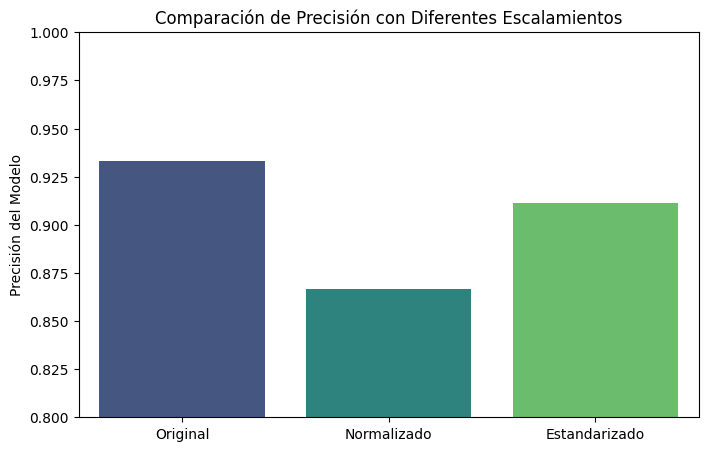

In [ ]:
print("\nResumen de Precisión")
print(f"Precisión (Original): {accuracy_original:.4f}")
print(f"Precisión (Normalizado): {accuracy_normalized:.4f}")
print(f"Precisión (Estandarizado): {accuracy_standardized:.4f}")

# Visualización de la comparación
metrics = ['Original', 'Normalizado', 'Estandarizado']
accuracies = [accuracy_original, accuracy_normalized, accuracy_standardized]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=accuracies, palette='viridis')
plt.ylabel('Precisión del Modelo')
plt.title('Comparación de Precisión con Diferentes Escalamientos')
plt.ylim(0.8, 1.0) # Ajustar los límites para ver mejor las diferencias si son pequeñas
plt.show()


### Nota en práctica profesional

    Siempre ajusta el escalador solo sobre el set de entrenamiento, y luego aplícalo a test. Esto previene data leakage y mantiene la validación confiable.
    Especialmente en modelos de redes neuronales, la normalización entre 0 y 1 acelera significativamente el entrenamiento.

### Recomendaciones finales

    Usa normalización cuando trabajes con modelos basados en distancia o entornos multimedia con magnitudes variadas.

    Prefiere estandarización si:

        Tienes outliers.
        Usa regresión, PCA, SVM, L1/L2-regularización o redes neuronales con descenso de gradiente.

    Experimenta: prueba ambos y compara rendimiento del modelo (accuracy, ROC-AUC, etc.) para elegir lo mejor para tu caso específico.